User's Guide, Chapter 7: Chords
================================

Chords, as the name might suggest, are objects that combine multiple :class:`~music21.pitch.Pitch` objects on a single stem.  They can be found in the :ref:`moduleChord` module. The most general way to create a :class:`~music21.chord.Chord` object is by passing in a list of pitch names you want in the chord:

In [1]:
from music21 import *
cMinor = chord.Chord(["C4","G4","E-5"]) 

`Note` and `Chord` objects, since both are subclasses of the :class:`~music21.note.GeneralNote` object share many features in common:

In [2]:
cMinor.duration.type = 'half'
cMinor.quarterLength

2.0

But since a `Chord` contains many pitches, it does not have a `.pitch` attribute:

In [3]:
cMinor.pitch

AttributeError: 'Chord' object has no attribute 'pitch'

 Instead it has a :meth:`.pitches <music21.chord.Chord.pitches>` attribute which returns a Tuple of pitches in the Chord.

In [4]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

A little bit more about Python.  `.pitches` returns a tuple, what's that?  A tuple is like a list, except that unlike a list which has square brackets around it, a tuple has parentheses around it:

In [11]:
baroqueTuple = ('Strozzi', 'Bach', 'Handel', 'Telemann')
classicalList = ['Mozart', 'Haydn', 'Saint-George', 'Beethoven']

baroqueTuple

('Strozzi', 'Bach', 'Handel', 'Telemann')

In [12]:
classicalList

['Mozart', 'Haydn', 'Saint-George', 'Beethoven']

Both tuples and lists can find members by accessing them with numbers in square brackets:

In [13]:
baroqueTuple[0]

'Strozzi'

In [14]:
classicalList[0]

'Mozart'

But the biggest difference between the two is that you can manipulate a list, but not a tuple.  If we try to add someone to the classicalList, using `.append` it works great.

In [15]:
classicalList.append('Ella Fitzgerald') # she's a classic to me...

classicalList

['Mozart', 'Haydn', 'Saint-George', 'Beethoven', 'Ella Fitzgerald']

In [16]:
classicalList.remove('Mozart')

classicalList

['Haydn', 'Saint-George', 'Beethoven', 'Ella Fitzgerald']

But a tuple can't be changed:

In [17]:
baroqueTuple.append('Miles Davis')

AttributeError: 'tuple' object has no attribute 'append'

In this case, that's a shame, because Miles belongs with Bach! So we shouldn't have used a tuple there. 

But in the class of `.pitches` it makes sense that it returns a tuple, since changing the result `.pitches` separate from the Chord could be ambiguous -- did you mean to change the result of `.pitches` or to change the pitches in the chord itself?  `music21` will often return tuples in places where manipulating the result could cause headaches or bugs down the line.  In any case, it's easy to turn a tuple into a list or vice versa:

In [18]:
baroqueList = list(baroqueTuple)
baroqueList.append('Miles Davis')
baroqueList

['Strozzi', 'Bach', 'Handel', 'Telemann', 'Miles Davis']

In [19]:
classicalTuple = tuple(classicalList)
classicalTuple

('Haydn', 'Saint-George', 'Beethoven', 'Ella Fitzgerald')

Okay, back to chord, where we left off:

In [20]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

But you already knew what pitches were in the `Chord` since you just created it! What else can you do with it?

How about determining if it is a :meth:`major <music21.chord.Chord.isMajorTriad>` or a :meth:`minor <music21.chord.Chord.isMinorTriad>` triad?

In [21]:
cMinor.isMajorTriad()

False

In [22]:
cMinor.isMinorTriad()

True

You can also figure out if it is in inversion or not:

In [23]:
cMinor.inversion()

0

Chords in root position have inversion of 0.  But consider this other chord:

In [24]:
cMajor = chord.Chord(["E3","C4","G4"])
cMajor.inversion()

1

With this chord, two other methods become important:

In [25]:
cMajor.root()

<music21.pitch.Pitch C4>

In [26]:
cMajor.bass()

<music21.pitch.Pitch E3>

You can find the third and fifth of the `Chord` with .third and .fifth.  Note that these properties do not have `()` after them.  This was a mistake in how we created `music21` and hopefully this will all be fixed and consistent soon:

In [27]:
cMajor.third

<music21.pitch.Pitch E3>

In [28]:
cMajor.fifth

<music21.pitch.Pitch G4>

There is also a .seventh property, but it won't do anything here:

In [29]:
cMajor.seventh

The result of that is `None` which we can test like so...

In [30]:
cMajor.seventh is None

True

We can append or remove notes from a chord, just like in a set:

In [31]:
dMaj = chord.Chord('D4 F#4')
dMaj.add('A5')
dMaj

<music21.chord.Chord D4 F#4 A5>

In [32]:
dMaj.remove('D4')
dMaj

<music21.chord.Chord F#4 A5>

In [33]:
dMaj.add(pitch.Pitch('D3'))
dMaj.add(note.Note('F#5'))
dMaj

<music21.chord.Chord D3 F#4 F#5 A5>

Displaying Chords
---------------------

We can display the `Chord` object just like any :class:`~music21.note.Note` (Don't worry if this isn't working for you yet...we'll get this set up in Chapter 8)

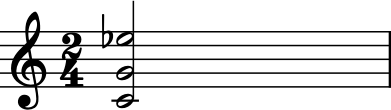

In [34]:
cMinor.show()

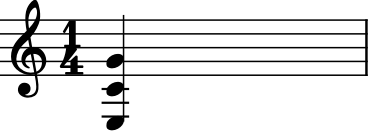

In [35]:
cMajor.show()

These chords are a bit "spacey", so let's get ``c`` in :meth:`~music21.chord.Chord.closedPosition`:

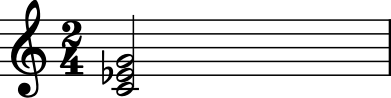

In [36]:
cClosed = cMinor.closedPosition()
cClosed.show()

Notice that ``cMinor`` is unchanged. The closed position chord is only `cClosed`:

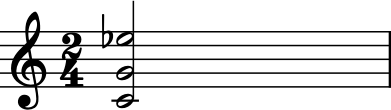

In [37]:
cMinor.show()

If we wanted to change the Chord object itself, we call ```.closedPosition(inPlace=True)``` which alters the original.  Since the original is altered, we don't put `x = ...` in front of it.

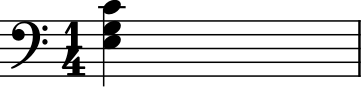

In [38]:
cMajor.closedPosition(inPlace=True)
cMajor.show()

There is also a method, :meth:`~music21.chord.Chord.semiClosedPosition` which acts like `.closedPosition` except that if there is already a pitch at that step (i.e., D-flat and D-sharp are both step "D"), then the note is moved up an octave. This is useful for displaying complex, post tonal chords in the most compact form possible:

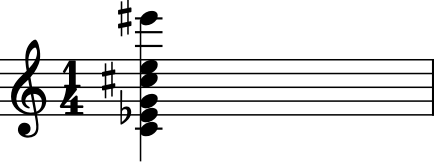

In [39]:
c1 = chord.Chord(['C4', 'E5', 'C#6', 'E-7', 'G8', 'C9', 'E#9'])
c2 = c1.semiClosedPosition()
c2.show()

We can get the :meth:`common name <music21.chord.Chord.commonName>` of each of these Chords:

In [40]:
cn1 = cMinor.commonName
print(cn1)

minor triad


In [41]:
print(cMajor.commonName)

major triad


More complex chords have less common "commonNames".  Here's one that the American composer Elliott Carter liked a lot.

In [42]:
elliottCarterChord = chord.Chord(['C4','D-4','E4','F#4'])
elliottCarterChord.commonName

'all-interval tetrachord'

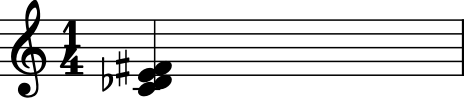

In [43]:
elliottCarterChord.show()

More ways of creating chords; Chords and Streams
--------------------------------------------------

There are other ways of creating a Chord if you'd like. One way is from a bunch of already created `Note` objects:

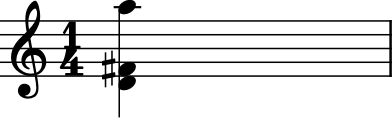

In [44]:
d = note.Note('D4')
fSharp = note.Note('F#4')
a = note.Note('A5')
dMajor = chord.Chord([d, fSharp, a])

dMajor.show()

Or we can pass a string with note names separated by spaces:

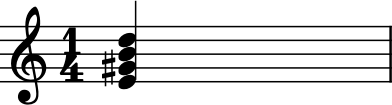

In [45]:
e7 = chord.Chord("E4 G#4 B4 D5")
e7.show()

The octaves are optional, especially if everything is within an octave:

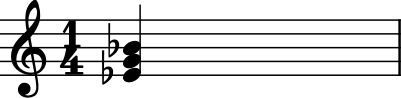

In [46]:
es = chord.Chord("E- G B-")
es.show()

But you will definitely want them if a chord crosses the boundary of an octave (between B and C).  Unless you love 6-4 chords, this is probably not what you want:

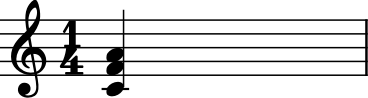

In [47]:
fMajor = chord.Chord("F A C")
fMajor.show()

Notice that because C sorts before F and A that the chord is in second inversion, or 64.  We can figure out the inversion of a ``Chord`` like so:

In [48]:
print(fMajor.inversion(), fMajor.inversionName())

2 64


In addition to .commonName, there are a few other "name" properties that might be interesting:

In [49]:
fMajor.fullName

'Chord {F | A | C} Quarter'

In [50]:
fMajor.pitchedCommonName

'F-major triad'

Like `Note` objects, we can put `Chord` objects inside a :class:`~music21.stream.Stream`:

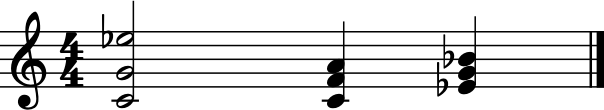

In [51]:
stream1 = stream.Stream()
stream1.append(cMinor)
stream1.append(fMajor)
stream1.append(es)
stream1.show()

We can mix and match `Notes`, :class:`Rests <music21.note.Rest>`, and `Chords`:

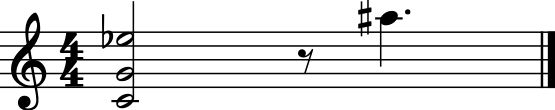

In [52]:
rest1 = note.Rest()
rest1.quarterLength = 0.5
noteASharp = note.Note('A#5')
noteASharp.quarterLength = 1.5

stream2 = stream.Stream()
stream2.append(cMinor)
stream2.append(rest1)
stream2.append(noteASharp)
stream2.show()

Post-tonal chords (in brief)
-------------------------------

There are a lot of methods for dealing with post-tonal aspects of chords.  If you're not interested in twentieth century music, go ahead and skip to the next chapter, but, here are some fun things.

The `intervalVector` of a chord is a list of the number of `[semitones, whole-tones, minor-thirds/augmented-seconds, major-thirds, perfect fourths, and tritones]` in the chord or inversion.  A minor triad, for instance, has one minor third (C to E-flat), one major third (E-flat to G), and one perfect fourth (G to C above, since octave does not matter):

In [53]:
cMinor.intervalVector

[0, 0, 1, 1, 1, 0]

A major triad has the same interval vector:

In [54]:
cMajor.intervalVector

[0, 0, 1, 1, 1, 0]

The elliottCarterChord is unique in that it has an `.intervalVector` of all 1's:

In [55]:
elliottCarterChord.intervalVector

[1, 1, 1, 1, 1, 1]

Well, it's almost unique: there is another chord with the same `.intervalVector`. That Chord is called its Z-relation or Z-pair.

In [56]:
elliottCarterChord.hasZRelation

True

In [57]:
otherECChord = elliottCarterChord.getZRelation()
otherECChord

<music21.chord.Chord C D- E- G>

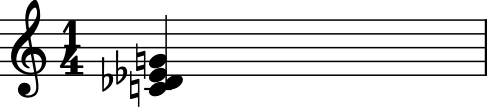

In [58]:
otherECChord.show()

In [59]:
otherECChord.intervalVector

[1, 1, 1, 1, 1, 1]

The other post-tonal tools you might be interested in are given below. We'll return to them in a later chapter, but here are three important ones:

In [60]:
print(elliottCarterChord.primeForm)

[0, 1, 4, 6]


In [61]:
print(elliottCarterChord.normalOrder)

[0, 1, 4, 6]


In [62]:
print(elliottCarterChord.forteClass)

4-15A


If you really only care about semitones, you can create a chord just with the pitchClasses:

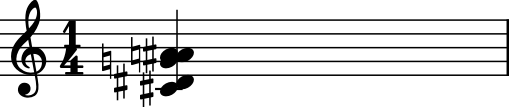

In [63]:
oddChord = chord.Chord([1, 3, 7, 9, 10])
oddChord.show()

There's a little problem with the A and A# being on the same space that makes it hard to read.  Let's flip the A# to Bb:

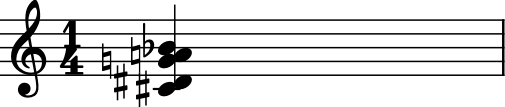

In [64]:
oddChord.pitches[-1].getHigherEnharmonic(inPlace=True)
oddChord.show()

If you use pitchClasses above 11, then they are treated as MIDI numbers, where 60 = MiddleC, 72 = C5, etc.  Enharmonic spelling is chosen automatically.

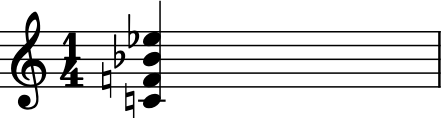

In [65]:
midiChordType = chord.Chord([60, 65, 70, 75])
midiChordType.show()

Okay, so now you've learned the basics (and more!) of Notes and Chords.  If you haven't been able to see them on your own, :ref:`Chapter 8: Installing MusicXML Readers <usersGuide_08_installingMusicXML>` will fix it.  It's also going to cover the basic file formats of `music21`.